In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\ML\housing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

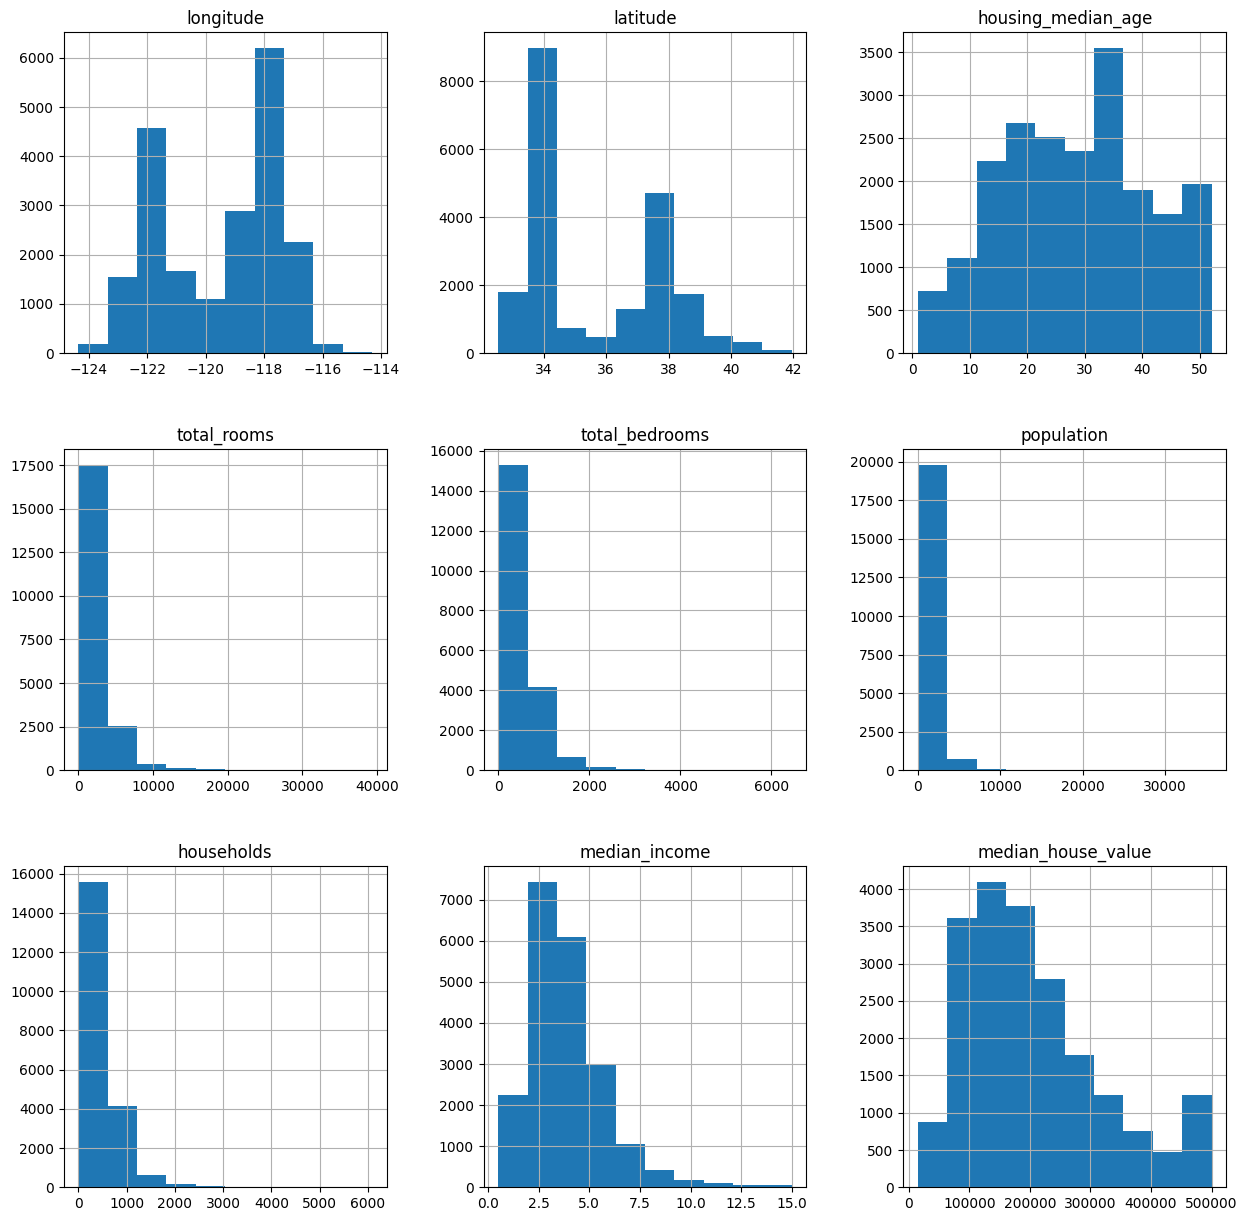

In [5]:
df.hist(figsize=(15,15))

In [6]:
from statsmodels.stats.stattools import medcouple

In [7]:

columns = df.select_dtypes(include=[np.number]).columns
new_df = df.copy()
for i_col in columns:
    MC = medcouple(df[i_col])
    IQR = df[i_col].quantile(0.75) - df[i_col].quantile(0.25)
    left_line = df[i_col].quantile(0.25) - (MC + 1.5) * IQR
    right_line = df[i_col].quantile(0.75) + (MC + 1.5) * IQR
    new_df = new_df[(new_df[i_col] > left_line) & (new_df[i_col] < right_line)]
df = new_df


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

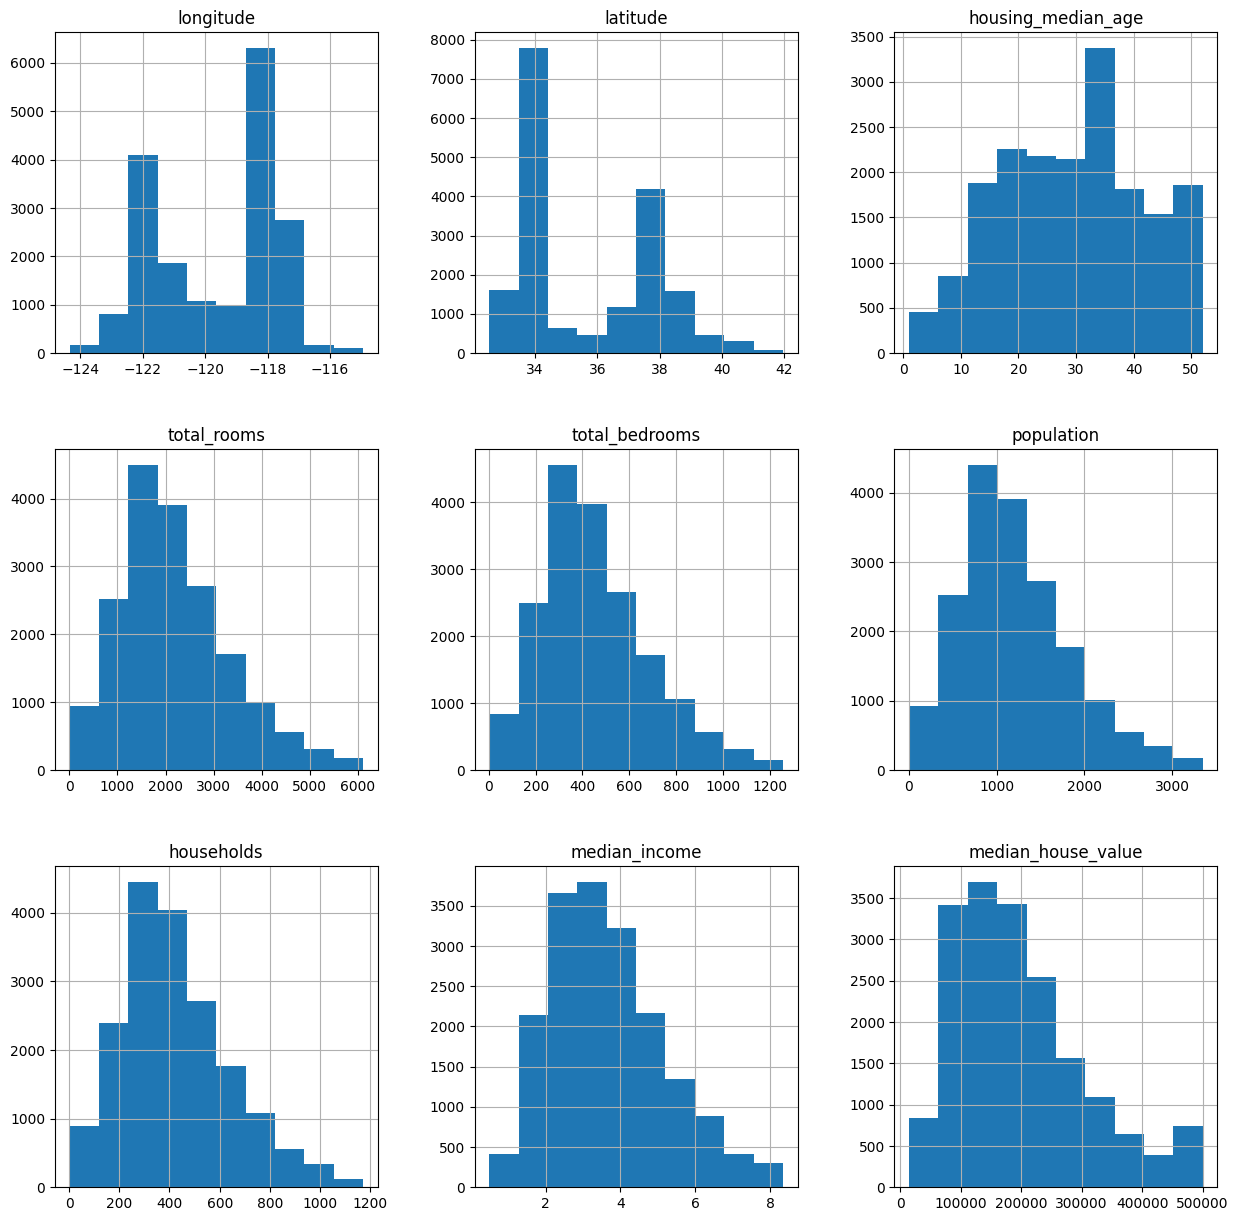

In [8]:
df.hist(figsize=(15,15))

In [9]:
df = pd.get_dummies(df, dtype=int)
df.rename(columns={"ocean_proximity_<1H OCEAN": "Less 1 h to OCEA"}, inplace=True)

In [10]:
# Объединим признаки, имеющие сильную корреляцию.
# df['bedrooms per household'] = df['total_bedrooms']/ df['households']
# df['total_rooms per housrhold'] = df['total_rooms']/ df['households']
# df[' household per person'] = df['households']/df['population']
# #Удалим признаки, имеющие слабую корреляцию с целевой переменной.
# # df.drop(['total_bedrooms','total_rooms', 'households',  ], axis=1, inplace=True)
# df

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18355 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   18355 non-null  float64
 1   latitude                    18355 non-null  float64
 2   housing_median_age          18355 non-null  float64
 3   total_rooms                 18355 non-null  float64
 4   total_bedrooms              18355 non-null  float64
 5   population                  18355 non-null  float64
 6   households                  18355 non-null  float64
 7   median_income               18355 non-null  float64
 8   median_house_value          18355 non-null  float64
 9   Less 1 h to OCEA            18355 non-null  int32  
 10  ocean_proximity_INLAND      18355 non-null  int32  
 11  ocean_proximity_ISLAND      18355 non-null  int32  
 12  ocean_proximity_NEAR BAY    18355 non-null  int32  
 13  ocean_proximity_NEAR OCEAN  18355 no

In [12]:
#Выберем модель, которая дает лучший результат для имеющихся данных.
#Найдем бейзлайн.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # Importación para XGBoost
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor  # Importación para MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('SVR', SVR(max_iter=1000)),
    ('XGBoost Regressor', XGBRegressor()),  # Nuevo modelo XGBoost
    ('CatBoost Regressor', CatBoostRegressor(verbose=False)),  # Nuevo modelo CatBoost
    ('LightGBM Regressor', LGBMRegressor()),  # Nuevo modelo LightGBM
    ('MLP Regressor', MLPRegressor())  # Nuevo modelo MLPRegressor
]

In [13]:
# Разделим данные наобучающий и тестовый набор
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=123)

In [14]:
metrics_dict = {'Model': [], 'MAE': [], 'R^2': [], 'RMSE':[]}

# Пройдемя циклом по всем моделям и для каждой посчиатем метрики качества.
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Выведем значение метрик по кадой модели
    print(f'Model: {model_name}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R^2): {r2}')
    print(f'RMSE : {rmse}')
    print('-' * 40)
    
    # Сохраним значение местрик качества по каждой модели в словарь
    metrics_dict['Model'].append(model_name)
    metrics_dict['MAE'].append(mae)
    metrics_dict['R^2'].append(r2)
    metrics_dict['RMSE'].append(rmse)

Model: Linear Regression
Mean Absolute Error (MAE): 48178.37809839622
R-squared (R^2): 0.6154071833914234
RMSE : 66181.62545493478
----------------------------------------
Model: Ridge Regression
Mean Absolute Error (MAE): 48180.33727308774
R-squared (R^2): 0.6154402750087425
RMSE : 66178.77815248856
----------------------------------------


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+12, tolerance: 1.725e+10
  model = cd_fast.enet_coordinate_descent(


Model: Lasso Regression
Mean Absolute Error (MAE): 48178.638206320815
R-squared (R^2): 0.6154183907553872
RMSE : 66180.6611532944
----------------------------------------
Model: Decision Tree Regressor
Mean Absolute Error (MAE): 43742.174067011714
R-squared (R^2): 0.5925240450721811
RMSE : 68122.07034293225
----------------------------------------
Model: Random Forest Regressor
Mean Absolute Error (MAE): 31647.975344592756
R-squared (R^2): 0.7924254236636854
RMSE : 48621.004318796644
----------------------------------------
Model: Gradient Boosting Regressor
Mean Absolute Error (MAE): 38377.75231638035
R-squared (R^2): 0.7309451659809383
RMSE : 55355.04969085797
----------------------------------------


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model: SVR
Mean Absolute Error (MAE): 86069.04727682276
R-squared (R^2): -0.008347877462704156
RMSE : 107162.30329385598
----------------------------------------
Model: XGBoost Regressor
Mean Absolute Error (MAE): 30475.23802693408
R-squared (R^2): 0.8124305582499308
RMSE : 46218.717282508966
----------------------------------------
Model: CatBoost Regressor
Mean Absolute Error (MAE): 29691.48159878046
R-squared (R^2): 0.824738174842348
RMSE : 44676.640690266315
----------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 14684, number of used features: 12
[LightGBM] [Info] Start training from score 199219.151730
M

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

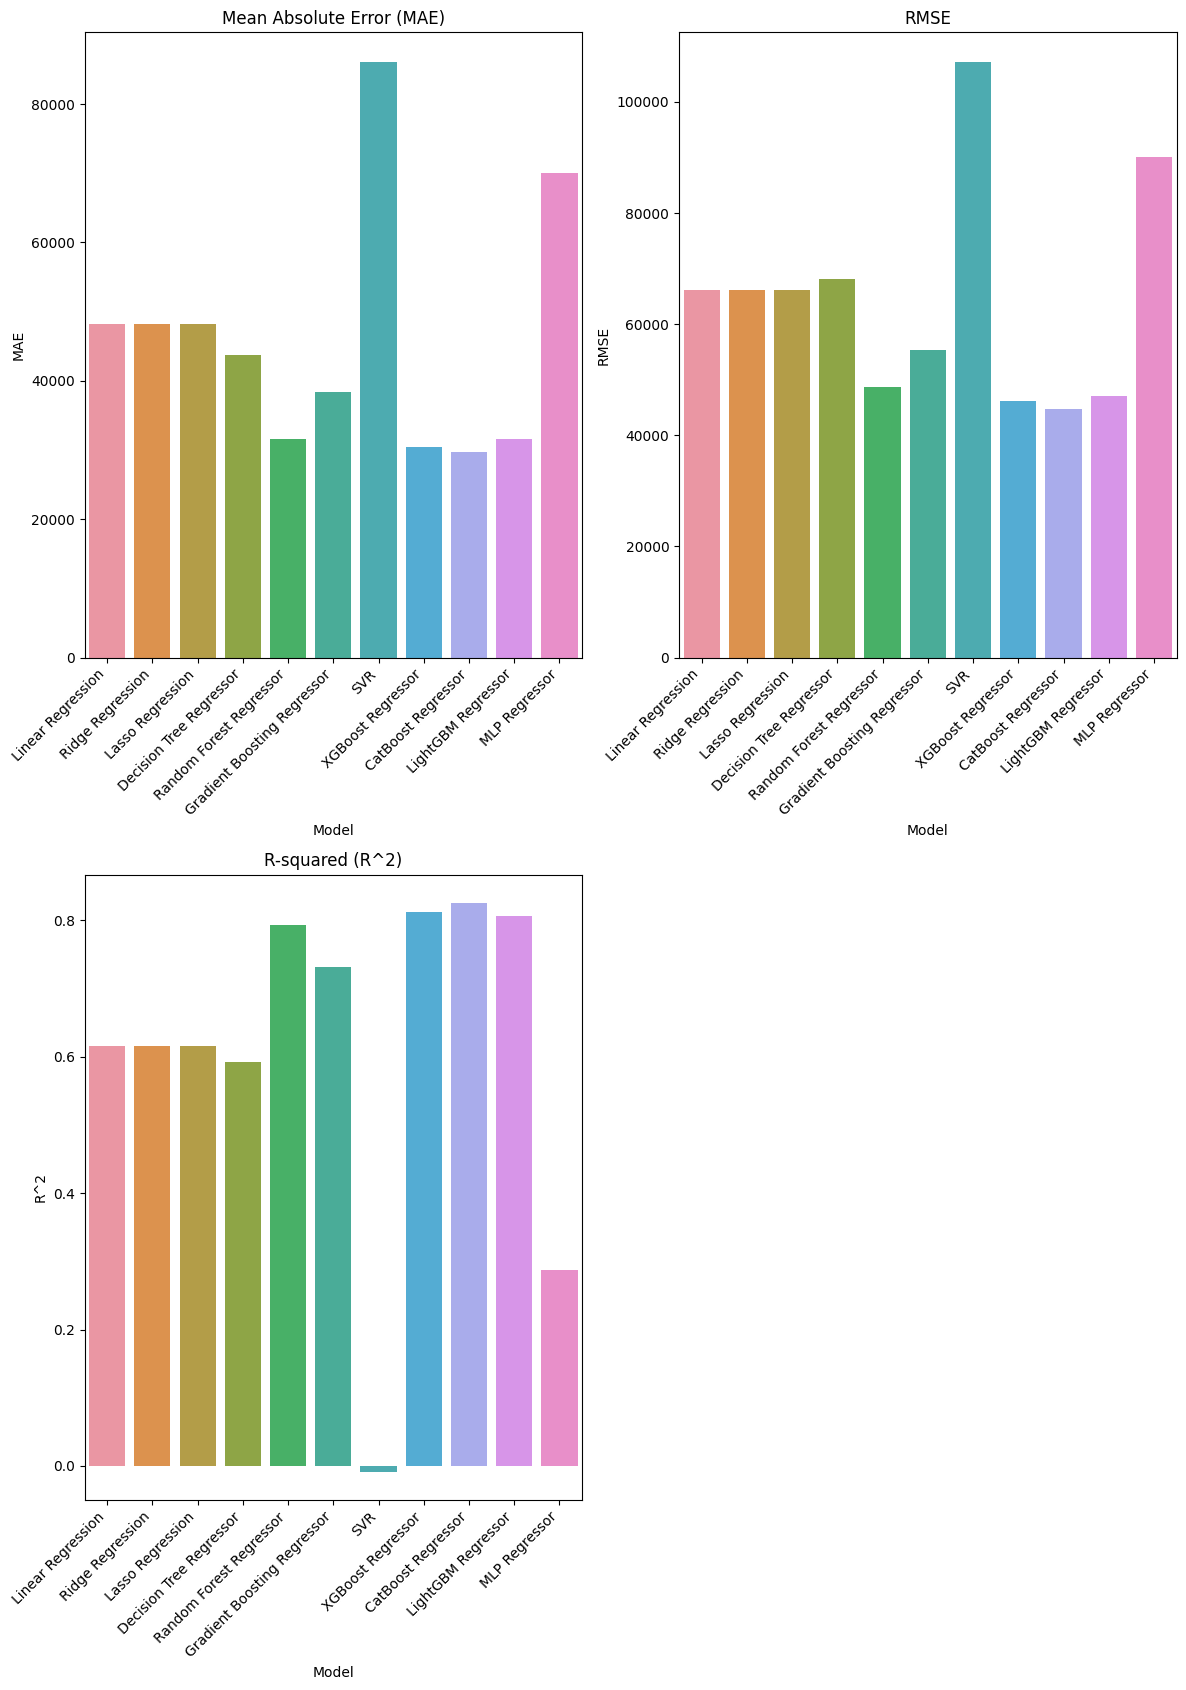

In [16]:

# Конверитрем словарь с метриками качества моделей в датафрейм
metrics_df = pd.DataFrame(metrics_dict)

# Порстроим гистограммы по полученнным данным
plt.figure(figsize=(12, 17))

# Гистограмма MAE по различным моделям
plt.subplot(2,2,1)
sns.barplot(x='Model', y='MAE', data=metrics_df)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')  

# Гистограмма MAE по различным моделям
plt.subplot(2,2,3)
sns.barplot(x='Model', y='R^2', data=metrics_df)
plt.title('R-squared (R^2)')
plt.xticks(rotation=45, ha='right')  


# # Barplot para RMSE
plt.subplot(2,2,2)
sns.barplot(x='Model', y='RMSE', data=metrics_df)
plt.title('RMSE')
plt.xticks(rotation=45, ha='right') 




plt.tight_layout()
plt.show()

In [17]:
metrics_df

,Model,MAE,R^2,RMSE
0,Linear Regression,48178.378098,0.615407,66181.625455
1,Ridge Regression,48180.337273,0.615440,66178.778152
2,Lasso Regression,48178.638206,0.615418,66180.661153
3,Decision Tree Regressor,43742.174067,0.592524,68122.070343
4,Random Forest Regressor,31647.975345,0.792425,48621.004319
5,Gradient Boosting Regressor,38377.752316,0.730945,55355.049691
6,SVR,86069.047277,-0.008348,107162.303294
7,XGBoost Regressor,30475.238027,0.812431,46218.717283
8,CatBoost Regressor,29691.481599,0.824738,44676.640690
9,LightGBM Regressor,31584.951718,0.805689,47041.956635


In [18]:
#Нименьшие показатели MAE и RMSE мы наблюдаем у модели CatBoost,  
# Наибольшее значение Коэффициента детерминации также можно наблюдать у данной модели, 
# что говорит о  тесной является связь между факторами регрессии и зависимой переменной.
# В дальнейшем будем работать с CatBoost, так как онапоказала наилучший результат для имеющихся данных.


<Axes: >

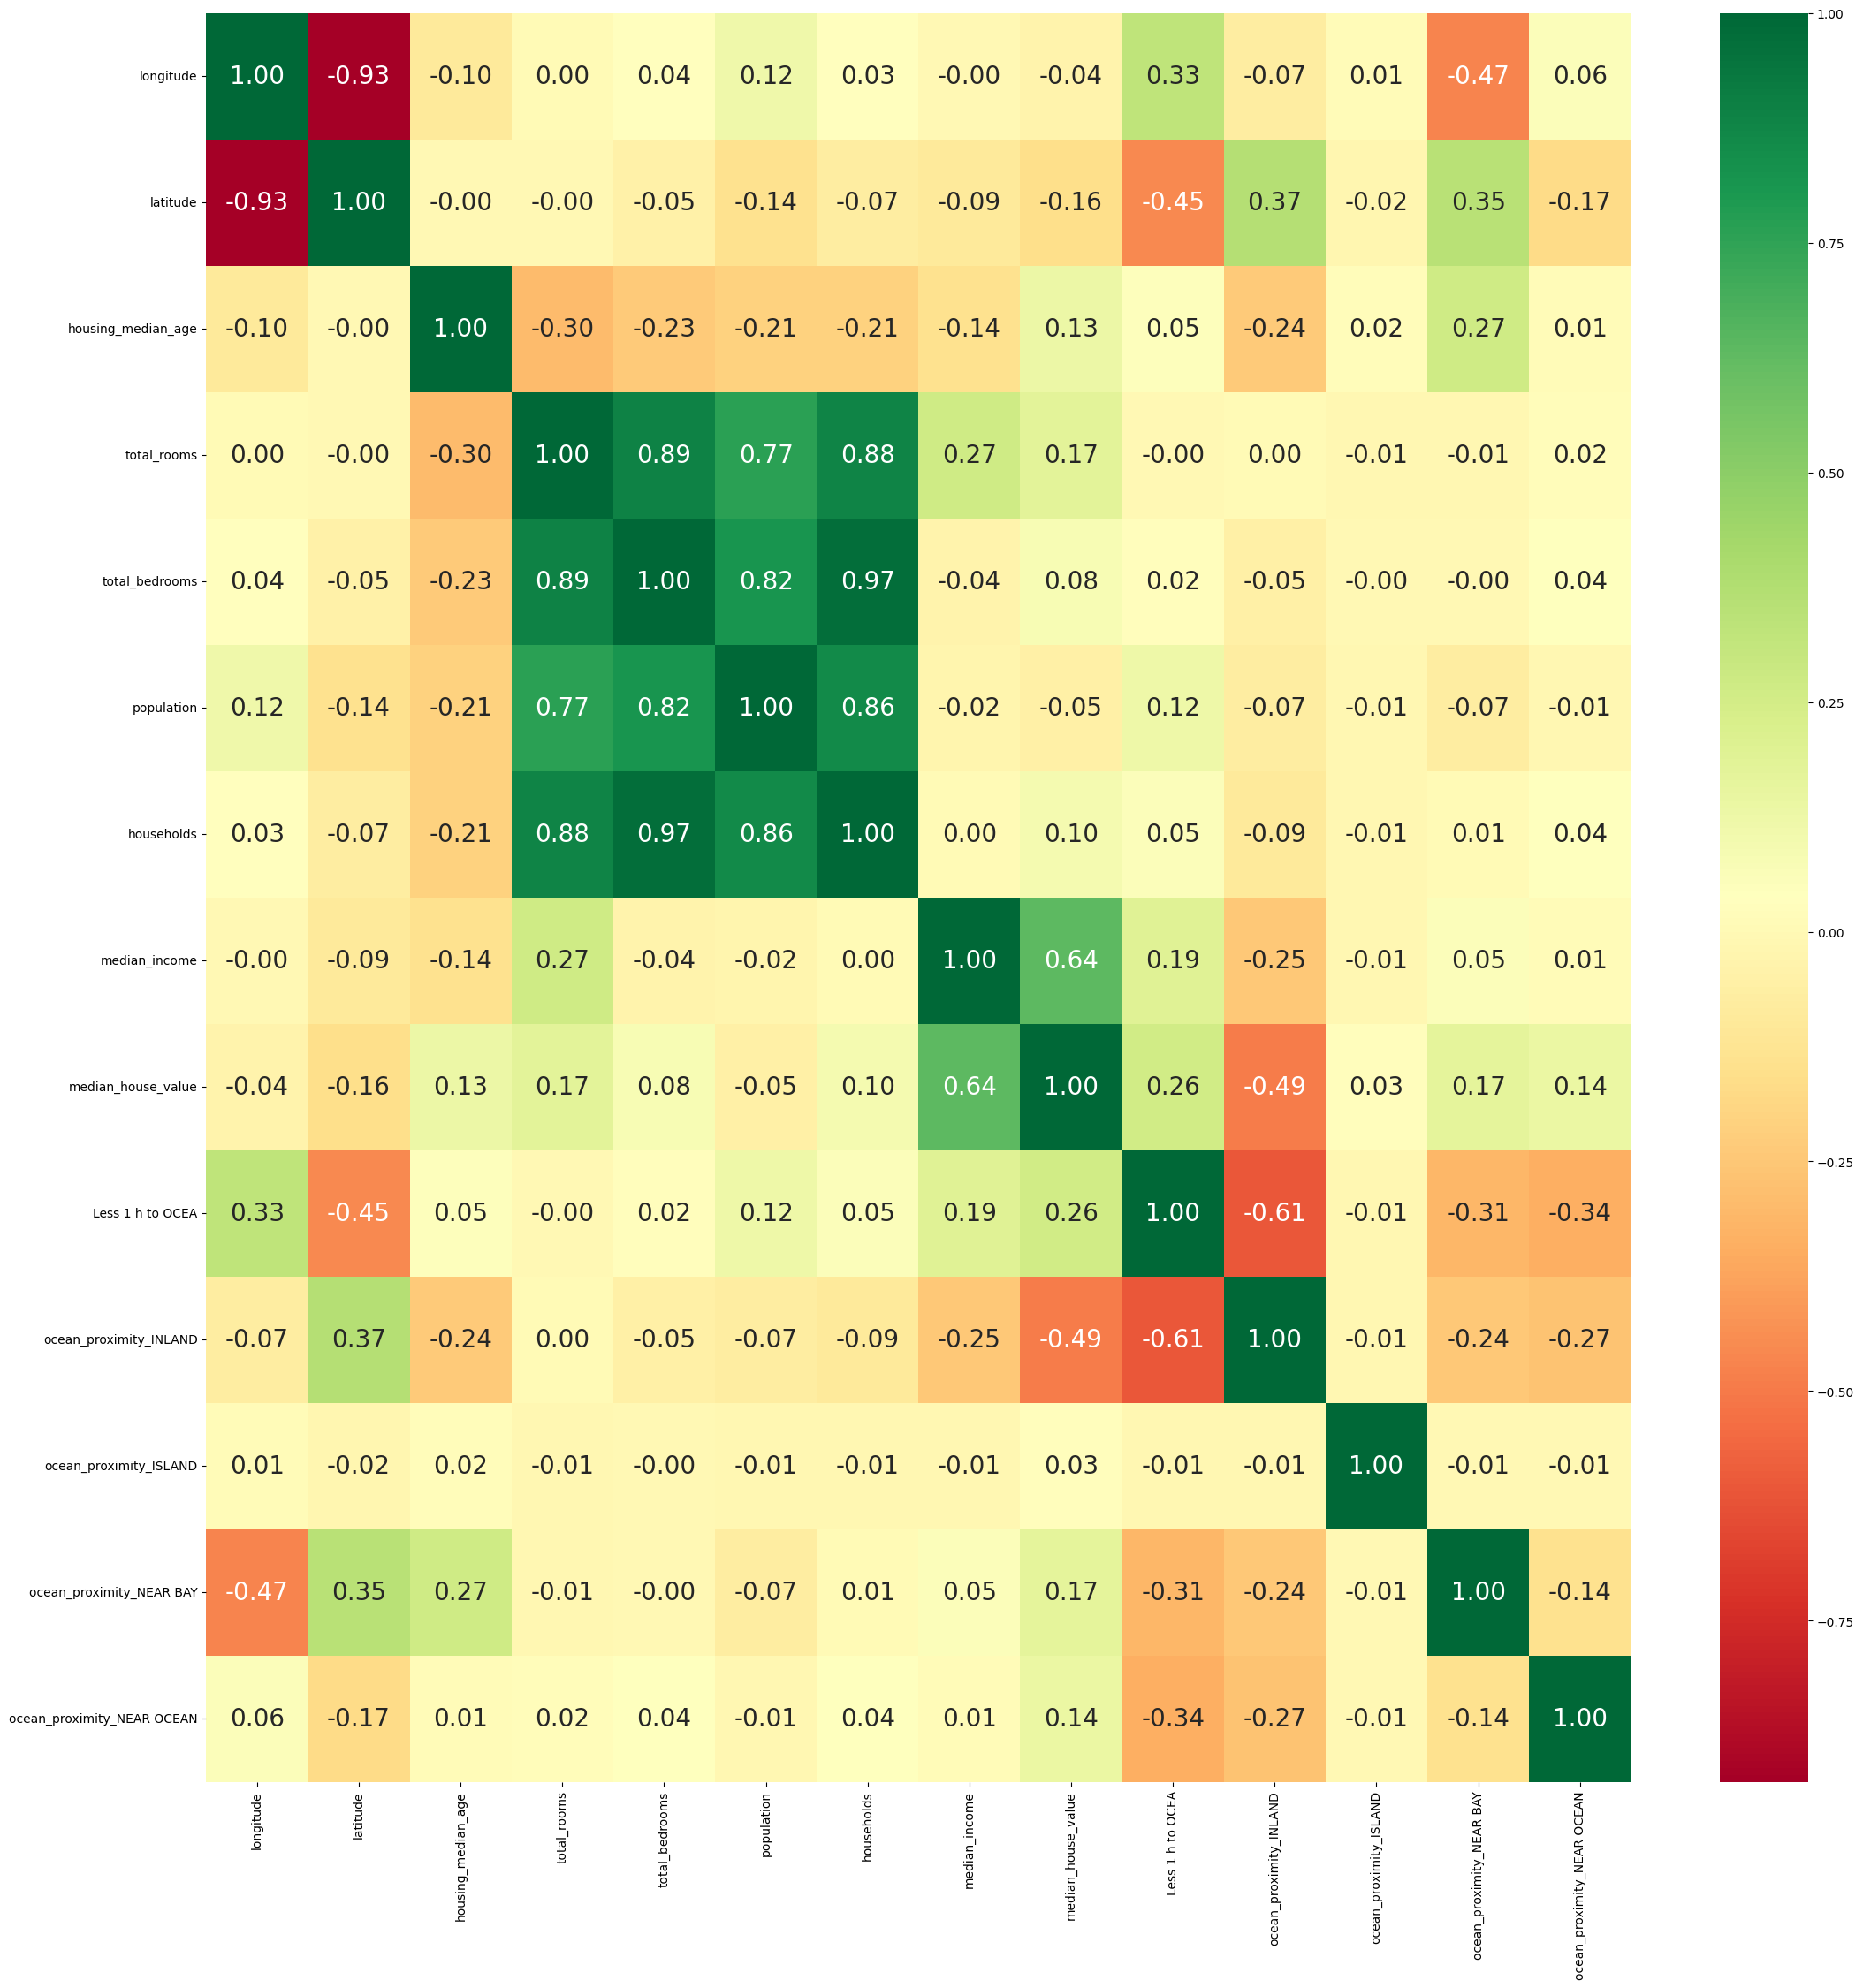

In [19]:
# Построим таблицу корреляции
f, ax = plt.subplots(figsize=(26, 26))
plt.xlabel(15)
plt.ylabel(15)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", ax=ax, cmap="RdYlGn", annot_kws={'size': 20} )

In [20]:
# Объединим признаки, имеющие сиьную корреляцию между собой:
df['total_rooms per housrhold'] = df['total_rooms']/ df['households'] # cреднее количество комнат на 1 дом
df[' household per person'] = df['households']/df['population'] # сренее количество домов, приходящихся на 1 человека


<Axes: >

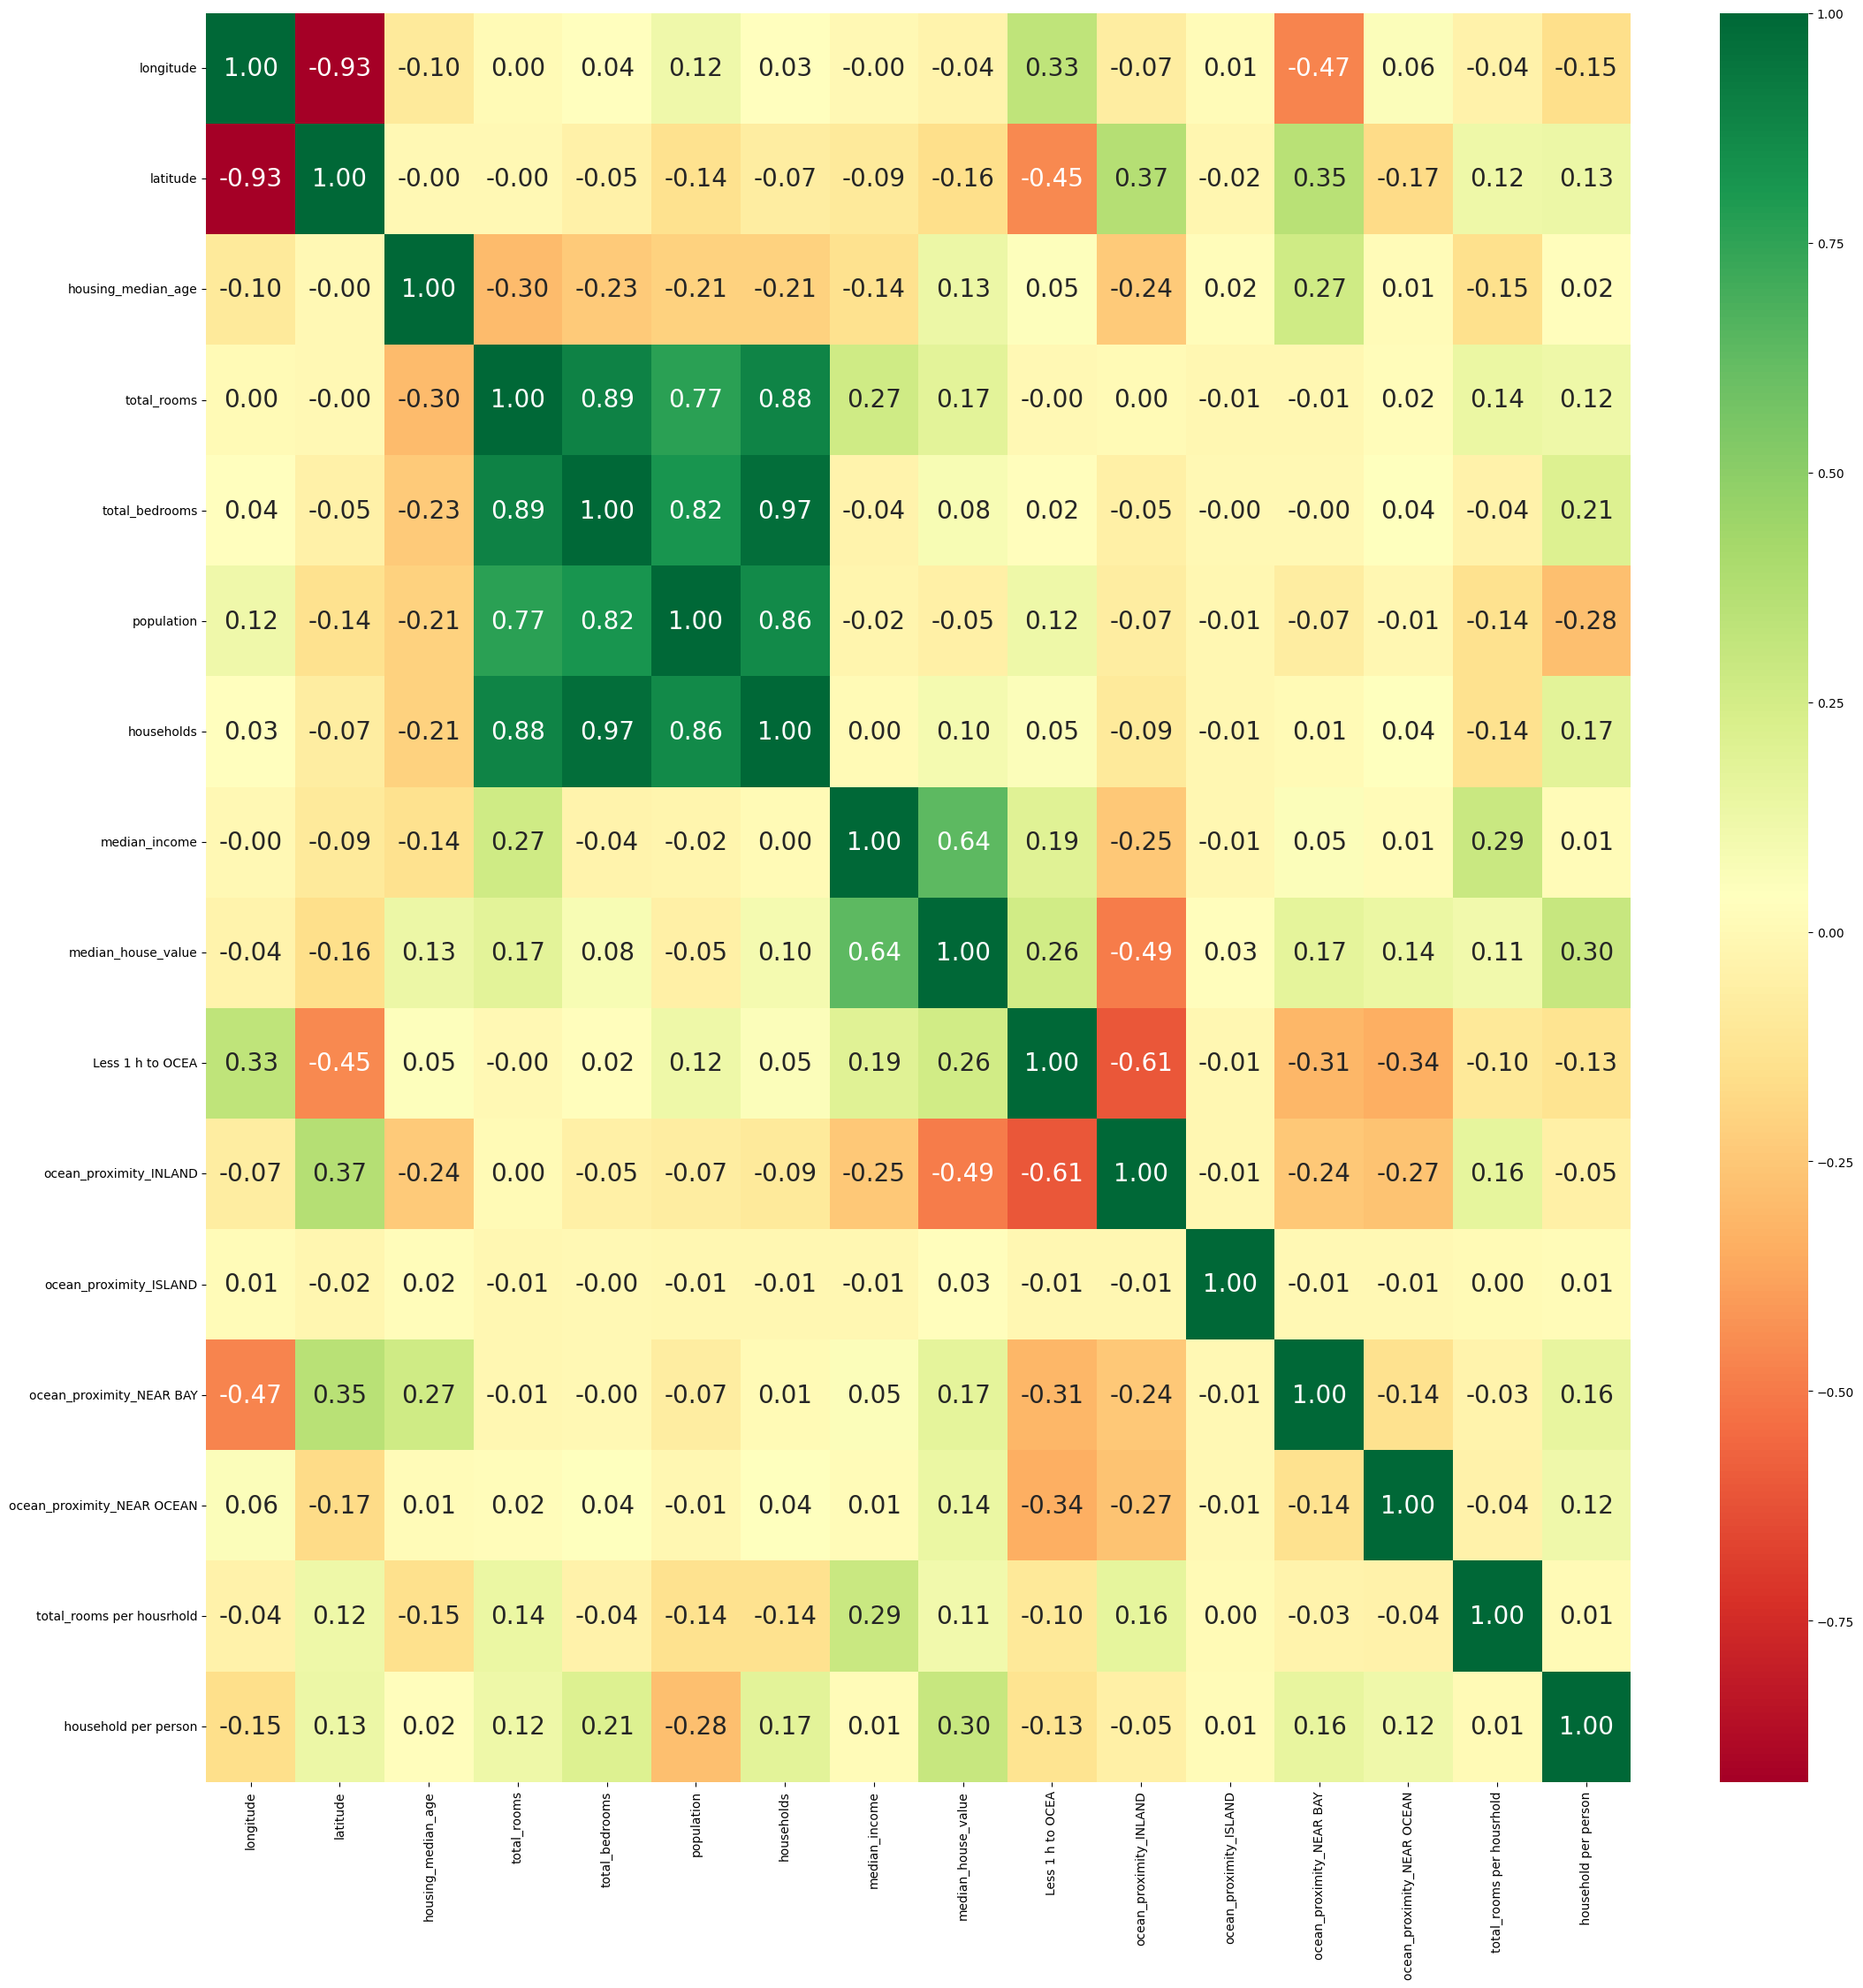

In [21]:
# Проверим, какие признаки имеют с целевой переменной наименьшее значение коэффициента корреляции.
f, ax = plt.subplots(figsize=(26, 26))
plt.xlabel(15)
plt.ylabel(15)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", ax=ax, cmap="RdYlGn", annot_kws={'size': 20} )

In [22]:
df.select_dtypes(include='number').corr()['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.637395
 household per person         0.295485
Less 1 h to OCEA              0.261089
total_rooms                   0.174845
ocean_proximity_NEAR BAY      0.165765
ocean_proximity_NEAR OCEAN    0.140977
housing_median_age            0.127843
total_rooms per housrhold     0.105088
households                    0.096146
total_bedrooms                0.076179
ocean_proximity_ISLAND        0.027809
longitude                    -0.035825
population                   -0.053925
latitude                     -0.155847
ocean_proximity_INLAND       -0.491523
Name: median_house_value, dtype: float64

In [23]:
#Удалим из признаков те, которые имеют с целевой меременной наименьшую корреляцию
X = df.drop(['median_house_value','total_bedrooms', 'population', 'households' ],  axis=1)

In [24]:
#Разделяем данный на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=420)

In [25]:
#Построим модель на основе данных с помощью CatBoost, без настройки параметров(найдем бейзлайн).
model = CatBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


Learning rate set to 0.062595
0:	learn: 104415.1018116	total: 11.5ms	remaining: 11.5s
1:	learn: 100824.2358639	total: 17.1ms	remaining: 8.51s
2:	learn: 97482.3135755	total: 22.4ms	remaining: 7.45s
3:	learn: 94366.7793316	total: 28.9ms	remaining: 7.19s
4:	learn: 91611.6636877	total: 31.7ms	remaining: 6.3s
5:	learn: 89035.0207620	total: 34.7ms	remaining: 5.75s
6:	learn: 86751.0016125	total: 39.5ms	remaining: 5.6s
7:	learn: 84598.2351156	total: 42ms	remaining: 5.21s
8:	learn: 82534.5104367	total: 44.4ms	remaining: 4.89s
9:	learn: 80752.9347636	total: 46.8ms	remaining: 4.63s
10:	learn: 79090.4762942	total: 49.3ms	remaining: 4.43s
11:	learn: 77463.7917162	total: 51.8ms	remaining: 4.26s
12:	learn: 75956.7027986	total: 55.2ms	remaining: 4.19s
13:	learn: 74623.9263090	total: 57.5ms	remaining: 4.05s
14:	learn: 73453.3045542	total: 59.9ms	remaining: 3.93s
15:	learn: 72294.9654523	total: 62.5ms	remaining: 3.84s
16:	learn: 71327.0246230	total: 65ms	remaining: 3.76s
17:	learn: 70343.8725700	total: 

In [26]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r2}')
print(f'RMSE : {rmse}')


Mean Absolute Error (MAE): 28266.597711289996
R-squared (R^2): 0.8406133453985241
RMSE : 43052.633437306045


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'learning_rate': [0.05, 0.08, 0.10],
    'depth': [4,6,8],
    'iterations': [300, 500, 800],
    'l2_leaf_reg': [3, 5, 10]
}


In [29]:
# grid_search = GridSearchCV(estimator=CatBoostRegressor(verbose=False), param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
# grid_search.fit(X_train,y_train )

In [30]:
# best_params = grid_search.best_params_

In [31]:
# grid_search.best_params_

In [32]:
best_params = {'depth': 8, 'iterations': 800, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [33]:
model = CatBoostRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

0:	learn: 101964.6944024	total: 11.7ms	remaining: 9.33s


1:	learn: 96367.3101299	total: 20.4ms	remaining: 8.14s
2:	learn: 91586.7548900	total: 36.3ms	remaining: 9.64s
3:	learn: 87116.4699333	total: 56.4ms	remaining: 11.2s
4:	learn: 83459.4016187	total: 116ms	remaining: 18.4s
5:	learn: 79899.6452093	total: 142ms	remaining: 18.8s
6:	learn: 76957.4910976	total: 151ms	remaining: 17.1s
7:	learn: 74364.2176205	total: 168ms	remaining: 16.6s
8:	learn: 71992.8275430	total: 178ms	remaining: 15.6s
9:	learn: 70063.1558848	total: 186ms	remaining: 14.7s
10:	learn: 68173.9535741	total: 194ms	remaining: 13.9s
11:	learn: 66558.6068722	total: 201ms	remaining: 13.2s
12:	learn: 65131.8999485	total: 212ms	remaining: 12.8s
13:	learn: 63775.5211758	total: 219ms	remaining: 12.3s
14:	learn: 62722.7545289	total: 229ms	remaining: 12s
15:	learn: 61777.0785955	total: 242ms	remaining: 11.9s
16:	learn: 60955.3959513	total: 249ms	remaining: 11.4s
17:	learn: 60282.2510967	total: 260ms	remaining: 11.3s
18:	learn: 59470.2617108	total: 268ms	remaining: 11s
19:	learn: 58792.478

In [44]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r2}')
print(f'RMSE : {rmse}')

Mean Absolute Error (MAE): 27588.223374184414
R-squared (R^2): 0.845398127816345
RMSE : 42401.490015426294


In [ ]:
#Дальнейшая подгонка параметров не приведет к заметному улучшению метрик качества моделей.

In [45]:
#Обучаем модель на всех данных
model = CatBoostRegressor(**best_params)
model.fit(X, y)

0:	learn: 101743.8815649	total: 9.61ms	remaining: 7.68s
1:	learn: 96097.4975526	total: 17.2ms	remaining: 6.86s
2:	learn: 91125.8697041	total: 23.9ms	remaining: 6.34s
3:	learn: 86708.0261950	total: 32.6ms	remaining: 6.48s
4:	learn: 82874.5611250	total: 40.5ms	remaining: 6.44s
5:	learn: 79482.9591966	total: 48ms	remaining: 6.36s
6:	learn: 76443.5479945	total: 54.6ms	remaining: 6.18s
7:	learn: 73719.6458419	total: 62.8ms	remaining: 6.22s
8:	learn: 71496.0723819	total: 80.6ms	remaining: 7.09s
9:	learn: 69362.1993424	total: 96.8ms	remaining: 7.65s
10:	learn: 67608.4426596	total: 109ms	remaining: 7.79s
11:	learn: 65932.2124350	total: 120ms	remaining: 7.88s
12:	learn: 64412.0708350	total: 128ms	remaining: 7.76s
13:	learn: 63065.6465059	total: 138ms	remaining: 7.74s
14:	learn: 62141.0501248	total: 145ms	remaining: 7.58s
15:	learn: 61063.1070593	total: 155ms	remaining: 7.59s
16:	learn: 60203.7307858	total: 171ms	remaining: 7.88s
17:	learn: 59469.0960798	total: 184ms	remaining: 8.02s
18:	learn: 

In [47]:
# сохранение модели в файл
import joblib
filename = 'house_value_cat_boost_model'
joblib.dump(model, filename) 

['house_value_cat_boost_model']